In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from pandas import read_csv
from sklearn.model_selection import train_test_split

import random
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

In [3]:
def prepare_data(df, num_elements=50):
    new_data = []
    length = df.shape[0]
    current_index = 0
    step = int(0.2 * num_elements)
    while(current_index <= length - num_elements):
        new_data.append(df[current_index:current_index+num_elements])
        current_index += step
    return new_data

In [4]:
class BPNN(nn.Module):

    def __init__(self, input_size, hidden_size):
        super(BPNN, self).__init__()
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(input_size, hidden_size)  
        self.fc2 = nn.Linear(hidden_size, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [5]:
def prepare_data(df, num_elements=50):
    new_data = []
    length = df.shape[0]
    current_index = 0
    step = int(0.2 * num_elements)
    while(current_index <= length - num_elements):
        new_data.append(df[current_index:current_index+num_elements])
        current_index += step
    return new_data

In [57]:
X_test = 0
y_test = 0

In [35]:
def learn(num, count, data_len, lr=0.01):
    num = [str(i) for i in range(num)]
    p1 = [read_csv('ics_data_preprocessed/06_Smart_Meter_45/P1/' + str(count) + '/' + n + '.csv', squeeze=True, parse_dates=['ts'], index_col='ts') for n in num]
    
    p1 = [prepare_data(df, data_len) for df in p1]
    p1 = sum(p1, [])
    p1 = [df.values.tolist() for df in p1]
    
    train, test = train_test_split(p1, test_size=0.2, random_state=42)
    train_data_normalized = train
    test_data_normalized = test
    
    train_data, val_data = train_test_split(train_data_normalized, test_size=0.15, random_state=42)
    train_data = torch.FloatTensor(train_data)
    val_data = torch.FloatTensor(val_data)
    test_data = torch.FloatTensor(test_data_normalized)
    
    X_train = train_data[:, :-10]
    y_train = train_data[:, -10:]
    X_val = val_data[:, :-10]
    y_val = val_data[:, -10:]
    X_test = test_data[:, :-10]
    y_test = test_data[:, -10:]
    
    print("Data is ready")
    
    best_model = BPNN(40, 50)
    loss_function = nn.MSELoss()
    
    val_losses = []
    
    best_hidden_layer_size = 50
    
    for hidden_layer_size in [50, 100, 200, 250, 300]:
        losses = []
        
    
        model = BPNN(data_len - 10, hidden_layer_size)
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    
        epochs = 1000
        
        for i in range(epochs):
            model.train()
            
            optimizer.zero_grad()
            
            y_pred = model(X_train)
            single_loss = loss_function(y_pred, y_train)
            losses.append(single_loss)
            
            single_loss.backward()
            optimizer.step()
            
            
            model.eval()

            with torch.no_grad():
                y_pred = model(X_val)

                single_loss = loss_function(y_pred, y_val)

                if (len(val_losses) == 0) or (single_loss < min(val_losses)):
#                     if (len(val_losses) > 0):
#                         print("losses:", single_loss, min(val_losses))
                    best_hidden_layer_size = hidden_layer_size
                    best_model = model
                
                val_losses.append(single_loss)
            
#             if (len(val_losses) > 0 and i%5 == 1):
#                 print(val_losses[-1], min(val_losses))

#         print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')
    
    print("best model hidden size:", best_hidden_layer_size)
    
    predictions = []
    best_model.eval()
    with torch.no_grad():
        predictions = [best_model(seq) for (seq, labels) in zip(X_test, y_test)]
    pred = [torch.cat((i, j)) for (i, j) in zip(X_test, predictions)]
    actual_predictions = np.array([np.array(i) for i in pred])
    mape = [np.mean(np.abs(actual_predictions[i] - test[i])/np.abs(test[i])) for i in range(len(test))]
    print(sum(mape) / len(mape))
    rmse = [np.mean((actual_predictions[i] - test[i])**2)**.5 for i in range(len(test))]
    print(sum(rmse) / len(rmse))
    
    return best_model
     

In [47]:
random.seed(42)

# 1s

In [216]:
new_model = learn(22, 1000, 50)

Data is ready
bast model hidden size: 10
bast model hidden size: 10
bast model hidden size: 10
bast model hidden size: 10
bast model hidden size: 10
bast model hidden size: 10
bast model hidden size: 10
bast model hidden size: 10
bast model hidden size: 10
bast model hidden size: 10
bast model hidden size: 10
bast model hidden size: 10
bast model hidden size: 10
bast model hidden size: 10
bast model hidden size: 10
bast model hidden size: 10
bast model hidden size: 10
bast model hidden size: 10
bast model hidden size: 10
bast model hidden size: 10
bast model hidden size: 10
bast model hidden size: 10
bast model hidden size: 10
bast model hidden size: 10
bast model hidden size: 10
bast model hidden size: 10
bast model hidden size: 10
bast model hidden size: 10
bast model hidden size: 10
bast model hidden size: 10
bast model hidden size: 10
bast model hidden size: 10
bast model hidden size: 10
bast model hidden size: 10
bast model hidden size: 10
bast model hidden size: 10
bast model hid

In [219]:
new_model = learn(22, 1000, 100)

Data is ready
best model hidden size: 50
best model hidden size: 50
best model hidden size: 50
best model hidden size: 50
best model hidden size: 50
best model hidden size: 50
best model hidden size: 50
best model hidden size: 50
best model hidden size: 50
best model hidden size: 50
best model hidden size: 50
best model hidden size: 50
best model hidden size: 50
best model hidden size: 50
best model hidden size: 50
best model hidden size: 50
best model hidden size: 50
best model hidden size: 50
best model hidden size: 50
best model hidden size: 50
best model hidden size: 50
best model hidden size: 50
best model hidden size: 50
best model hidden size: 50
best model hidden size: 50
best model hidden size: 50
best model hidden size: 50
best model hidden size: 50
best model hidden size: 50
best model hidden size: 50
best model hidden size: 50
best model hidden size: 50
best model hidden size: 50
best model hidden size: 50
best model hidden size: 50
best model hidden size: 50
best model hid

In [222]:
new_model = learn(22, 1000, 150)

Data is ready
best model hidden size: 200
0.027817939831367725
22.37582217557779


In [223]:
new_model = learn(22, 1000, 200)

Data is ready
best model hidden size: 50
0.0023428382697945694
4.184962426734432


In [224]:
new_model = learn(22, 1000, 250)

Data is ready
best model hidden size: 50
0.30215959884981763
152.18131702676396


In [225]:
new_model = learn(22, 1000, 300)

Data is ready
best model hidden size: 100
0.2651244717539825
182.91376192530242


In [226]:
new_model = learn(22, 1000, 350)

Data is ready
best model hidden size: 100
0.038838741693066066
159.08731803590248


In [58]:
new_model = learn(22, 1000, 400)

Data is ready
best model hidden size: 250
0.3966723314508273
252.2313253931686


In [228]:
new_model = learn(22, 1000, 450)

Data is ready
best model hidden size: 100
0.021129950683135834
59.16241110282127


In [229]:
new_model = learn(22, 1000, 500)

Data is ready
best model hidden size: 300
0.0191807900558035
155.00699023173544


In [230]:
new_model = learn(22, 1000, 550)

Data is ready
best model hidden size: 300
0.014133060155918089
12.901376278387845


In [231]:
new_model = learn(22, 1000, 600)

Data is ready
best model hidden size: 300
0.3693775320804962
287.25246982691124


In [232]:
new_model = learn(22, 1000, 650)

Data is ready
best model hidden size: 250
0.025816668527276744
23.93767646721396


In [233]:
new_model = learn(22, 1000, 700)

Data is ready
best model hidden size: 250
0.015570552685085889
17.65191231969109


# 1.5s

In [234]:
new_model = learn(141, 1500, 50)

Data is ready
best model hidden size: 300
0.008054145959138198
27.74338500376912


In [235]:
new_model = learn(141, 1500, 100)

Data is ready
best model hidden size: 250
0.0026519796952699016
13.409269598047986


In [236]:
new_model = learn(141, 1500, 150)

Data is ready
best model hidden size: 50
0.004265092969733348
22.54378391311932


In [237]:
new_model = learn(141, 1500, 200)

Data is ready
best model hidden size: 250
0.005267968275355583
38.316857488028894


In [238]:
new_model = learn(141, 1500, 250)

Data is ready
best model hidden size: 50
0.0032155518277116606
27.194124354491453


In [239]:
new_model = learn(141, 1500, 300)

Data is ready
best model hidden size: 100
0.0037199348559186465
30.019917460407534


In [36]:
new_model = learn(141, 1500, 350)

Data is ready
best model hidden size: 100
0.0021045707079640863
22.22222436222327


In [241]:
new_model = learn(141, 1500, 400)

Data is ready
best model hidden size: 50
0.00833392862094285
50.16539361932614


In [242]:
new_model = learn(141, 1500, 450)

Data is ready
best model hidden size: 50
0.002698880564950367
25.259220250595227


In [243]:
new_model = learn(141, 1500, 500)

Data is ready
best model hidden size: 100
0.0023564532436898197
33.461373854118044


In [244]:
new_model = learn(141, 1500, 550)

Data is ready
best model hidden size: 50
0.0026695085933389766
34.065141584917484


In [245]:
new_model = learn(141, 1500, 600)

Data is ready
best model hidden size: 300
0.016496605523214313
104.1126326937266


In [246]:
new_model = learn(141, 1500, 650)

Data is ready
best model hidden size: 50
1.802148770163675e-05
0.1308913552397698


In [247]:
new_model = learn(141, 1500, 700)

Data is ready
best model hidden size: 50
0.0006799881906174894
5.59064380371526


# 2s

In [248]:
new_model = learn(902, 2000, 50)

Data is ready
best model hidden size: 250
0.02208680503695614
11.308637939217443


In [249]:
new_model = learn(902, 2000, 100)

Data is ready
best model hidden size: 250
0.005220648180175407
7.463887114517538


In [250]:
new_model = learn(902, 2000, 150)

Data is ready
best model hidden size: 100
0.008272007281504339
8.00635728855444


In [251]:
new_model = learn(902, 2000, 200)

Data is ready
best model hidden size: 200
0.00488527100377845
5.589294918183363


In [252]:
new_model = learn(902, 2000, 250)

Data is ready
best model hidden size: 50
0.008137597799661596
8.70908655070027


In [253]:
new_model = learn(902, 2000, 300)

Data is ready
best model hidden size: 100
0.003873046104087469
6.073010706349245


In [254]:
new_model = learn(902, 2000, 350)

Data is ready
best model hidden size: 200
0.004128642713897277
4.6236260931490385


In [255]:
new_model = learn(902, 2000, 400)

Data is ready
best model hidden size: 100
0.0034128087116235615
7.485356019153323


In [256]:
new_model = learn(902, 2000, 450)

Data is ready
best model hidden size: 200
0.005008118650089709
6.602140775327648


In [257]:
new_model = learn(902, 2000, 500)

Data is ready
best model hidden size: 50
0.003013473838466168
7.087870104040411


In [258]:
new_model = learn(902, 2000, 550)

Data is ready
best model hidden size: 100
0.0034507939759488675
8.04428778066417


In [259]:
new_model = learn(902, 2000, 600)

Data is ready
best model hidden size: 50
0.0049802128578223534
6.831696027391249


In [260]:
new_model = learn(902, 2000, 650)

Data is ready
best model hidden size: 50
0.0021391777230846654
3.763664921440388


In [261]:
new_model = learn(902, 2000, 700)

Data is ready
best model hidden size: 50
0.00284890176089696
5.876460975034966


In [262]:
new_model = learn(902, 2000, 750)

Data is ready
best model hidden size: 50
0.004477039117829672
11.887734419608671


In [263]:
new_model = learn(902, 2000, 800)

Data is ready
best model hidden size: 100
0.00328818609171318
7.280287827237149


In [264]:
new_model = learn(902, 2000, 850)

Data is ready
best model hidden size: 50
0.0012205803531695366
4.6542359537636075


In [265]:
new_model = learn(902, 2000, 900)

Data is ready
best model hidden size: 50
0.0020629709277501167
4.096174545340053


In [266]:
new_model = learn(902, 2000, 950)

Data is ready
best model hidden size: 100
0.0020751451930455717
5.185283239593383


In [267]:
new_model = learn(902, 2000, 1000)

Data is ready
best model hidden size: 50
0.009025376821136816
18.64384591159633


# 5s

In [268]:
new_model = learn(19, 5000, 50)

Data is ready
best model hidden size: 300
0.018264583839033344
53.83521189377849


In [269]:
new_model = learn(19, 5000, 100)

Data is ready
best model hidden size: 100
0.009865470370167616
39.98896335714709


In [270]:
new_model = learn(19, 5000, 150)

Data is ready
best model hidden size: 100
0.008084530917878436
30.417174367197063


In [271]:
new_model = learn(19, 5000, 200)

Data is ready
best model hidden size: 250
0.007304477014139014
29.233109726527935


In [272]:
new_model = learn(19, 5000, 250)

Data is ready
best model hidden size: 100
0.0045375279184582335
28.85223375725586


In [273]:
new_model = learn(19, 5000, 300)

Data is ready
best model hidden size: 50
0.005812659955113731
33.42670973390308


In [274]:
new_model = learn(19, 5000, 350)

Data is ready
best model hidden size: 50
0.0042342616667356845
25.05698708937745


In [275]:
new_model = learn(19, 5000, 400)

Data is ready
best model hidden size: 50
0.004966593505159717
25.195573474686334


In [276]:
new_model = learn(19, 5000, 450)

Data is ready
best model hidden size: 50
0.004690037491089644
22.896979478139905


In [277]:
new_model = learn(19, 5000, 500)

Data is ready
best model hidden size: 50
0.0034818699252313415
22.4764451228531


In [278]:
new_model = learn(19, 5000, 550)

Data is ready
best model hidden size: 100
0.017888700437577836
148.79499682896923


In [279]:
new_model = learn(19, 5000, 600)

Data is ready
best model hidden size: 50
0.016256399960408494
118.40379256828538


In [280]:
new_model = learn(19, 5000, 650)

Data is ready
best model hidden size: 50
0.0034210518134481817
17.684857069650583


In [281]:
new_model = learn(19, 5000, 700)

Data is ready
best model hidden size: 50
0.013979941563488167
102.45275857394832


In [282]:
new_model = learn(19, 5000, 750)

Data is ready
best model hidden size: 50
0.005693564401521202
37.89982989819058


In [283]:
new_model = learn(19, 5000, 800)

Data is ready
best model hidden size: 100
0.012340077292594898
139.777973554717


In [284]:
new_model = learn(19, 5000, 850)

Data is ready
best model hidden size: 50
0.008862838158347838
39.41388066832807


In [285]:
new_model = learn(19, 5000, 900)

Data is ready
best model hidden size: 50
0.0022279822722527766
18.98921387933384


In [286]:
new_model = learn(19, 5000, 950)

Data is ready
best model hidden size: 50
0.001384044693793202
22.852187029512574


In [287]:
new_model = learn(19, 5000, 1000)

Data is ready
best model hidden size: 50
0.009815506084718107
117.11642641141019


# 15s

In [288]:
new_model = learn(20, 15000, 50)

Data is ready
best model hidden size: 300
0.02754968006727709
52.50165668769412


In [289]:
new_model = learn(20, 15000, 100)

Data is ready
best model hidden size: 200
0.02558766858311854
74.09988936325314


In [290]:
new_model = learn(20, 15000, 150)

Data is ready
best model hidden size: 100
0.017889204203802172
51.70425516634007


In [291]:
new_model = learn(20, 15000, 200)

Data is ready
best model hidden size: 200
0.013532937156294767
50.021623935487085


In [292]:
new_model = learn(20, 15000, 250)

Data is ready
best model hidden size: 100
0.008325647158308039
29.044510803712356


In [293]:
new_model = learn(20, 15000, 300)

Data is ready
best model hidden size: 50
0.010130710885423841
36.838812613763785


In [294]:
new_model = learn(20, 15000, 350)

Data is ready
best model hidden size: 50
0.006727597541685623
33.576452122496434


In [295]:
new_model = learn(20, 15000, 400)

Data is ready
best model hidden size: 50
0.008501593311913257
37.10462889152316


In [296]:
new_model = learn(20, 15000, 450)

Data is ready
best model hidden size: 50
0.008350403469843141
28.8237178051841


In [297]:
new_model = learn(20, 15000, 500)

Data is ready
best model hidden size: 50
0.007091412831785291
39.04830640680348


In [298]:
new_model = learn(20, 15000, 550)

Data is ready
best model hidden size: 50
0.01715689845882255
65.32104168991043


In [299]:
new_model = learn(20, 15000, 600)

Data is ready
best model hidden size: 50
0.016222624612120973
71.8805637510387


In [300]:
new_model = learn(20, 15000, 650)

Data is ready
best model hidden size: 50
0.006498807846175997
31.224496374110796


In [301]:
new_model = learn(20, 15000, 700)

Data is ready
best model hidden size: 50
0.013866597656036253
61.464047743299325


In [302]:
new_model = learn(20, 15000, 750)

Data is ready
best model hidden size: 50
0.0130441457447155
76.85451830963378


In [303]:
new_model = learn(20, 15000, 800)

Data is ready
best model hidden size: 50
0.0019576462124694764
12.248898956074271


In [304]:
new_model = learn(20, 15000, 850)

Data is ready
best model hidden size: 50
0.011482915287106037
66.64845709460769


In [305]:
new_model = learn(20, 15000, 900)

Data is ready
best model hidden size: 100
0.010878701264642937
59.231134996900394


In [306]:
new_model = learn(20, 15000, 950)

Data is ready
best model hidden size: 50
0.010338349396011587
81.71214518899433


In [307]:
new_model = learn(20, 15000, 1000)

Data is ready
best model hidden size: 100
0.00981264728180649
78.7566590558633


In [62]:
num = [str(i) for i in range(22)]
p1 = [read_csv('ics_data_preprocessed/06_Smart_Meter_45/P1/1000/' + n + '.csv', squeeze=True, parse_dates=['ts'], index_col='ts') for n in num]
    
p1 = [prepare_data(df, 250) for df in p1]
p1 = sum(p1, [])
p1 = [df.values.tolist() for df in p1]
    
train, test = train_test_split(p1, test_size=0.2, random_state=42)
train_data_normalized = train
test_data_normalized = test
    
train_data, val_data = train_test_split(train_data_normalized, test_size=0.15, random_state=42)
train_data = torch.FloatTensor(train_data)
val_data = torch.FloatTensor(val_data)
test_data = torch.FloatTensor(test_data_normalized)
    
X_train = train_data[:, :-10]
y_train = train_data[:, -10:]
X_val = val_data[:, :-10]
y_val = val_data[:, -10:]
X_test = test_data[:, :-10]
y_test = test_data[:, -10:]
    
print("Data is ready")
    
loss_function = nn.MSELoss()
    
val_losses = []
    
best_hidden_layer_size = 50
    

losses = []
        
    
best_model = BPNN(250 - 10, best_hidden_layer_size)
model = BPNN(250 - 10, best_hidden_layer_size)
optimizer = torch.optim.Adam(model.parameters(), lr=0.2)
    
epochs = 1000
    
for i in range(epochs):
    model.train()
            
    optimizer.zero_grad()
            
    y_pred = model(X_train)
    single_loss = loss_function(y_pred, y_train)
    losses.append(single_loss)
            
    single_loss.backward()
    optimizer.step()
            
            
    model.eval()

    with torch.no_grad():
        y_pred = model(X_val)

        single_loss = loss_function(y_pred, y_val)

        if (len(val_losses) == 0) or (single_loss < min(val_losses)):

            best_model = model
                
        val_losses.append(single_loss)

    
print("best model hidden size:", best_hidden_layer_size)
    
predictions = []
best_model.eval()
with torch.no_grad():
    predictions = [best_model(seq) for (seq, labels) in zip(X_test, y_test)]
pred = [torch.cat((i, j)) for (i, j) in zip(X_test, predictions)]
actual_predictions = np.array([np.array(i) for i in pred])
mape = [np.mean(np.abs(actual_predictions[i] - test[i])/np.abs(test[i])) for i in range(len(test))]
print(sum(mape) / len(mape))
rmse = [np.mean((actual_predictions[i] - test[i])**2)**.5 for i in range(len(test))]
print(sum(rmse) / len(rmse))

Data is ready
best model hidden size: 50
0.01713400033149618
11.283920310211439


In [37]:
predictions = []
new_model.eval()
with torch.no_grad():
    predictions = [new_model(seq) for (seq, labels) in zip(X_test, y_test)]
pred = [torch.cat((i, j)) for (i, j) in zip(X_test, predictions)]
actual_predictions = np.array([np.array(i) for i in pred])
mape = [np.mean(np.abs(actual_predictions[i] - test[i])/np.abs(test[i])) for i in range(len(test))]
print(sum(mape) / len(mape))
rmse = [np.mean((actual_predictions[i] - test[i])**2)**.5 for i in range(len(test))]
print(sum(rmse) / len(rmse))

0.0021045707079640863
22.22222436222327


In [38]:
actual_predictions

array([[ 814.42   ,  809.905  ,  810.765  , ...,  756.8136 ,  753.07874,
         748.08624],
       [ 647.365  ,  647.365  ,  647.15   , ...,  578.8213 ,  575.2598 ,
         587.4822 ],
       [ 627.585  ,  627.155  ,  627.585  , ...,  675.8859 ,  665.6503 ,
         652.99023],
       ...,
       [ 817.     ,  813.13   ,  816.14   , ...,  758.8524 ,  755.98035,
         751.0334 ],
       [2464.33   , 2464.76   , 2459.6    , ..., 2226.4634 , 2220.2798 ,
        2235.3074 ],
       [ 809.045  ,  807.755  ,  810.765  , ...,  755.19714,  751.8027 ,
         746.71985]], dtype=float32)

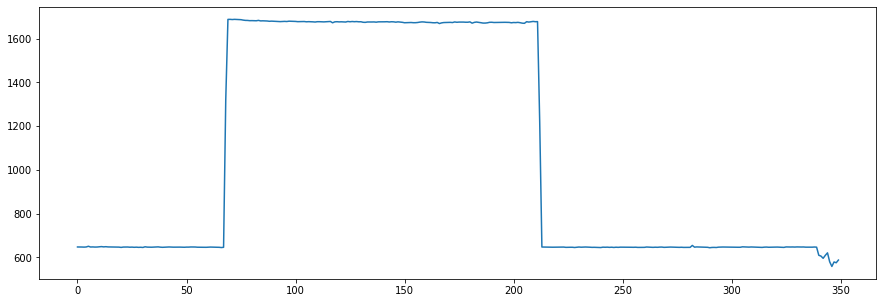

In [39]:
plt.plot(actual_predictions[1])

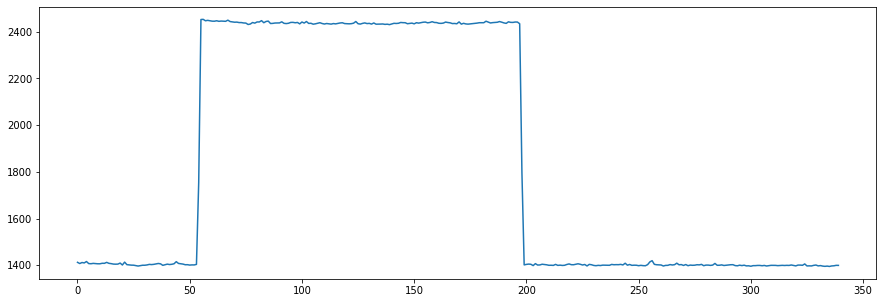

In [21]:
plt.plot(

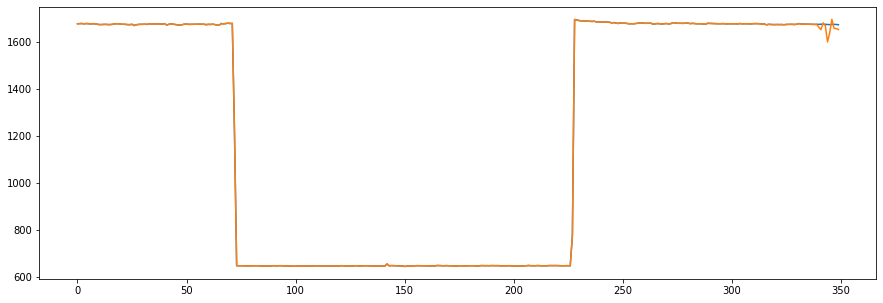

In [51]:
n = 10
plt.plot(test_data[n].numpy())
plt.plot(actual_predictions[n])
# 1.5, 350

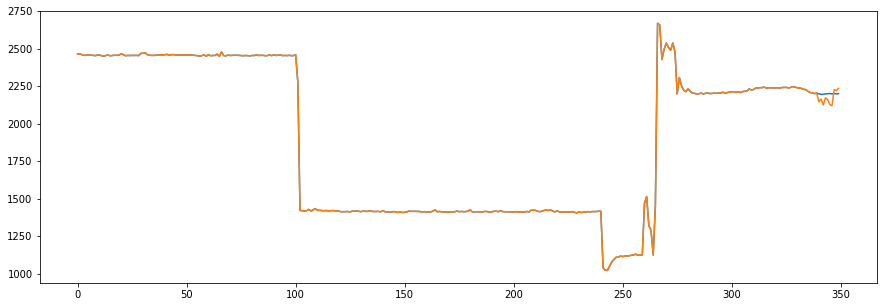

In [54]:
n = 13
plt.plot(test_data[n].numpy())
plt.plot(actual_predictions[n])
# 1.5, 350

In [63]:
predictions = []
new_model.eval()
with torch.no_grad():
    predictions = [new_model(seq) for (seq, labels) in zip(X_test, y_test)]
pred = [torch.cat((i, j)) for (i, j) in zip(X_test, predictions)]
actual_predictions = np.array([np.array(i) for i in pred])
mape = [np.mean(np.abs(actual_predictions[i] - test[i])/np.abs(test[i])) for i in range(len(test))]
print(sum(mape) / len(mape))
rmse = [np.mean((actual_predictions[i] - test[i])**2)**.5 for i in range(len(test))]
print(sum(rmse) / len(rmse))

0.3966723314508273
252.2313253931686


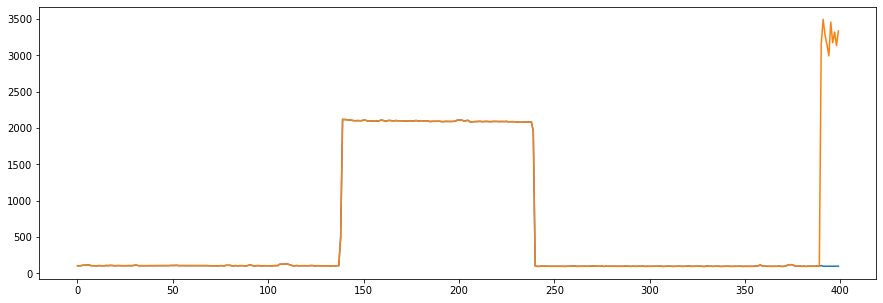

In [65]:
n = 1
plt.plot(test_data[n].numpy())
plt.plot(actual_predictions[n])
# 1, 400

In [164]:
num = [str(i) for i in range(902)]
p1 = [read_csv('ics_data_preprocessed/06_Smart_Meter_45/P1/2000/' + n + '.csv', squeeze=True, parse_dates=['ts'], index_col='ts') for n in num]
    
p1 = [prepare_data(df, 1000) for df in p1]
p1 = sum(p1, [])
p1 = [df.values.tolist() for df in p1]
    
train, test = train_test_split(p1, test_size=0.2, random_state=42)
train_data_normalized = train
test_data_normalized = test
    
train_data, val_data = train_test_split(train_data_normalized, test_size=0.15, random_state=42)
train_data = torch.FloatTensor(train_data)
val_data = torch.FloatTensor(val_data)
test_data = torch.FloatTensor(test_data_normalized)
    
X_train = train_data[:, :-10]
y_train = train_data[:, -10:]
X_val = val_data[:, :-10]
y_val = val_data[:, -10:]
X_test = test_data[:, :-10]
y_test = test_data[:, -10:]

In [165]:
loss_function = nn.MSELoss()
    
val_losses = []
    
best_hidden_layer_size = 50
    

losses = []
        
    
best_model = BPNN(1000 - 10, best_hidden_layer_size)
model = BPNN(1000 - 10, best_hidden_layer_size)
optimizer = torch.optim.Adam(model.parameters(), lr=0.2)
    
epochs = 1000
    
for i in range(epochs):
    model.train()
            
    optimizer.zero_grad()
            
    y_pred = model(X_train)
    single_loss = loss_function(y_pred, y_train)
    losses.append(single_loss)
            
    single_loss.backward()
    optimizer.step()
            
            
    model.eval()

    with torch.no_grad():
        y_pred = model(X_val)

        single_loss = loss_function(y_pred, y_val)

        if (len(val_losses) == 0) or (single_loss < min(val_losses)):

            best_model = model
                
        val_losses.append(single_loss)

    
print("best model hidden size:", best_hidden_layer_size)
    
predictions = []
best_model.eval()
with torch.no_grad():
    predictions = [best_model(seq) for (seq, labels) in zip(X_test, y_test)]
pred = [torch.cat((i, j)) for (i, j) in zip(X_test, predictions)]
actual_predictions_bpnn = np.array([np.array(i) for i in pred])
mape = [np.mean(np.abs(actual_predictions_bpnn[i] - test[i])/np.abs(test[i])) for i in range(len(test))]
print(sum(mape) / len(mape))
rmse = [np.mean((actual_predictions_bpnn[i] - test[i])**2)**.5 for i in range(len(test))]
print(sum(rmse) / len(rmse))

best model hidden size: 50
0.009391095047009058
18.978284618271815


In [71]:
class BPNN2(nn.Module):

    def __init__(self, input_size, hidden_size1, hidden_size2):
        super(BPNN2, self).__init__()
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(input_size, hidden_size1)  
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [167]:
  
loss_function = nn.MSELoss()
    
val_losses = []
    
best_hidden_layer_size = 100
    

losses = []
        
    
best_model = BPNN2(1000 - 10, 100, 150)
model = BPNN2(1000 - 10, 100, 150)
optimizer = torch.optim.Adam(model.parameters(), lr=0.2)
    
epochs = 1000
    
for i in range(epochs):
    model.train()
            
    optimizer.zero_grad()
            
    y_pred = model(X_train)
    single_loss = loss_function(y_pred, y_train)
    losses.append(single_loss)
            
    single_loss.backward()
    optimizer.step()
            
            
    model.eval()

    with torch.no_grad():
        y_pred = model(X_val)

        single_loss = loss_function(y_pred, y_val)

        if (len(val_losses) == 0) or (single_loss < min(val_losses)):

            best_model = model
                
        val_losses.append(single_loss)

    
print("best model hidden size:", best_hidden_layer_size)
    
predictions = []
best_model.eval()
with torch.no_grad():
    predictions = [best_model(seq) for (seq, labels) in zip(X_test, y_test)]
pred = [torch.cat((i, j)) for (i, j) in zip(X_test, predictions)]
actual_predictions_bpnn2 = np.array([np.array(i) for i in pred])
mape = [np.mean(np.abs(actual_predictions_bpnn2[i] - test[i])/np.abs(test[i])) for i in range(len(test))]
print(sum(mape) / len(mape))
rmse = [np.mean((actual_predictions_bpnn2[i] - test[i])**2)**.5 for i in range(len(test))]
print(sum(rmse) / len(rmse))

best model hidden size: 100
0.011474167176208507
9.069466334396838


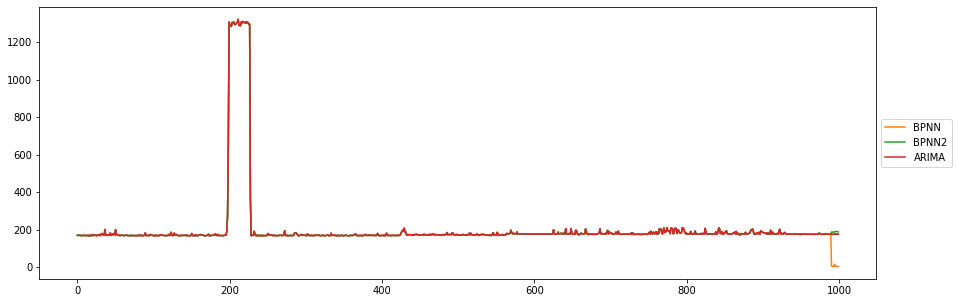

In [225]:
n = 19
plt.plot(test_data[n].numpy())
plt.plot(actual_predictions_bpnn[n], label='BPNN')
plt.plot(actual_predictions_bpnn2[n], label='BPNN2')
plt.plot(actual_prediction_arima, label='ARIMA')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

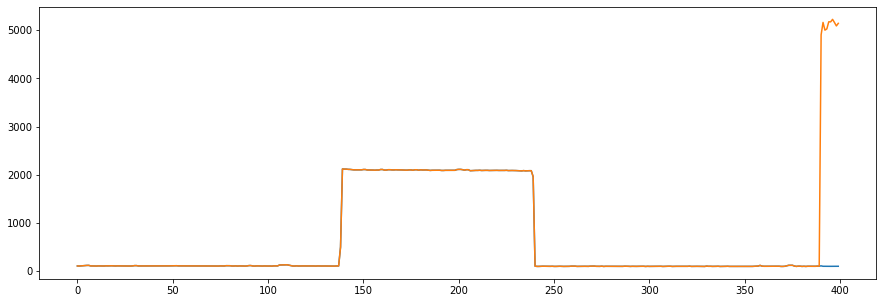

In [73]:
n = 1
plt.plot(test_data[n].numpy())


In [190]:
num = [str(i) for i in range(902)]
p1 = [read_csv('ics_data_preprocessed/06_Smart_Meter_45/P1/' + '2000' + '/' + n + '.csv', squeeze=True, parse_dates=['ts'], index_col='ts') for n in num]
p1 = [prepare_data(df, 1000) for df in p1]
p1 = sum(p1, [])

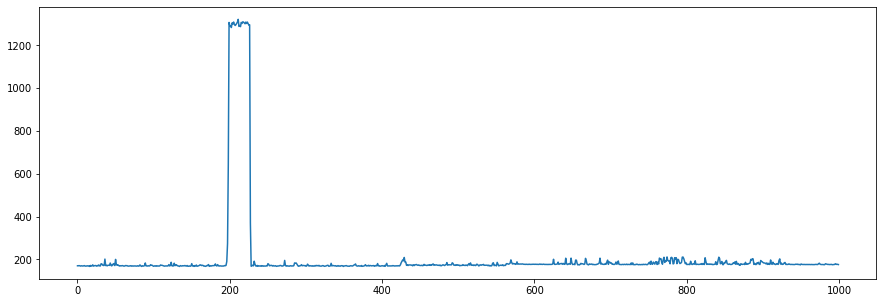

In [219]:
df = pd.Series(test_data[n].numpy())  
plt.plot(df)

In [216]:
test_data[n]

tensor([ 169.7400,  169.7400,  170.4600,  169.9200,  168.3000,  169.7400,
         169.3800,  168.6600,  169.3800,  170.6400,  168.6600,  168.1200,
         168.8400,  169.7400,  168.4800,  169.7400,  166.6800,  171.3600,
         168.3000,  169.0200,  174.2400,  168.3000,  169.9200,  170.6400,
         170.8200,  168.1200,  171.0000,  169.3800,  173.8800,  169.0200,
         169.0200,  179.2800,  178.3800,  172.9800,  171.1800,  171.5400,
         201.0600,  170.8200,  172.0800,  169.5600,  172.4400,  172.2600,
         171.7200,  182.5200,  171.3600,  169.3800,  176.7600,  174.7800,
         180.1800,  170.8200,  199.6200,  176.4000,  172.0800,  174.2400,
         171.3600,  168.6600,  170.2800,  169.2000,  169.7400,  170.6400,
         169.2000,  168.1200,  168.8400,  170.8200,  170.2800,  170.4600,
         168.6600,  168.1200,  168.4800,  169.2000,  170.1000,  167.9400,
         169.3800,  168.1200,  169.2000,  168.8400,  169.0200,  168.3000,
         168.4800,  169.9200,  168.120

In [220]:
import pmdarima as pm
mape_list = []
rmse_list = []
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    mape_list.append(mape)
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    rmse_list.append(rmse)
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr})

In [221]:
max_m = 5

train = df[:-10]
test = df[-10:]
best_model = pm.auto_arima(train.values, start_p=0, start_q=0,
                           test='adf',       # use adftest to find optimal 'd'
                           max_p=3, max_q=3, # maximum p and q
                           m=1,              # frequency of series
                           d=None,           # let model determine 'd'
                           seasonal=True,   # Seasonality
                           start_P=0, 
                           D=1, 
                           trace=False,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
for i in range(2, max_m):
    model = pm.auto_arima(train.values, start_p=0, start_q=0,
                          test='adf',       # use adftest to find optimal 'd'
                          max_p=3, max_q=3, # maximum p and q
                          m=i,              # frequency of series
                          d=None,           # let model determine 'd'
                          seasonal=True,   # Seasonality
                          start_P=0, 
                          D=1, 
                          trace=False,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=True)
        
        # Find the best model with MSE
    if np.mean((model.predict(n_periods=test.shape[0]) - test.values)**2) < np.mean((best_model.predict(n_periods=test.shape[0]) - test.values)**2):
        best_model = model
        
forecast_accuracy(best_model.predict(n_periods=test.shape[0]), test.values)

{'mape': 0.005020207259183333,
 'me': 0.1116328813995466,
 'mae': 0.8881194739392726,
 'mpe': 0.00067786139457254,
 'rmse': 1.19438463704924,
 'corr': 0.02943908871446359}

In [222]:
preds, conf_int = best_model.predict(n_periods=test.shape[0], return_conf_int=True, alpha=0.6)
lower_series = pd.Series(conf_int[:, 0], index=test.index)
upper_series = pd.Series(conf_int[:, 1], index=test.index)

In [223]:
actual_prediction_arima = train.append(pd.Series(best_model.predict(n_periods=test.shape[0]), index=test.index)).values

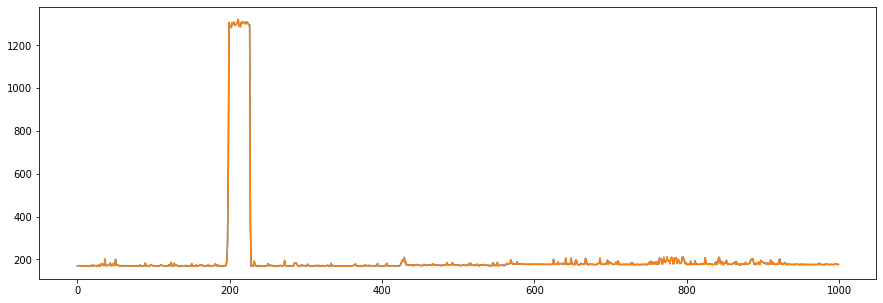

In [224]:
plt.plot(df.values)
plt.plot(actual_prediction_arima)

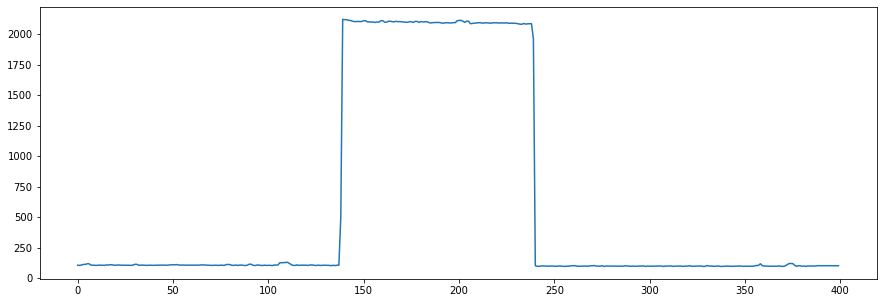

In [95]:
plt.plot(actual_prediction_arima)